In [1]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

# Importing the data and necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [4]:
path = 'After_BERT(Embedded_Data).csv'
df = pd.read_csv(path, index_col = 0)
df.head()

,Job Title,Company Name,Industry,Company Location,New Job (90 Days),Year Started,Profile Headline,Profile Summary,School,Degree,...,Degree_embedding,Education End_embedding,Field of Study_embedding,Domain_embedding,CompanyName_embedding,JobTitle_embedding,My Network_embedding,Country_embedding,Continent_embedding,FieldOfStudy_embedding
0,Battery Designer,Rivian,Mechanical or Industrial Engineering,"Dublin, Ohio, United States",False,2020.0,"Mechanical Design Engineer, System Integration...",In the ever-growing technological world where ...,Chalmers University of Technology,pg,...,-0.616228,-0.534899,0.078564,0.195954,0.388687,0.142881,-0.345625,0.217775,0.208209,0.661440
1,Digital DevOps Engineer,HSBC,Information Technology and Services,New York City Metropolitan Area,False,2018.0,Digital DevOps Engineer at HSBC,AWS Certified Cloud Engineer holding 3 AWS Ass...,Binghamton University,pg,...,-0.616228,-0.534899,-0.594768,0.195954,0.297323,0.092447,-0.345625,0.217775,0.208209,-0.594768
2,Product Designer,"Two Point Conversions, Inc.",Information Technology and Services,"Chicago, Illinois, United States",False,2018.0,Leading Product + UX at Remedy (Two Point Conv...,http://aroonmathai.com,Carnegie Mellon University,pg,...,-0.616228,-0.534899,0.145754,0.195954,-0.190701,0.142881,-0.345625,0.217775,0.208209,-0.594768
3,Product Designer,udaan.com,Information Technology and Services,"Bangalore Urban, Karnataka, India",False,2018.0,Product Designer at udaan,NaN,Vellore Institute of Technology,ug,...,-0.128450,-0.534899,-0.226775,0.195954,0.143441,0.142881,-0.345625,-0.156677,-0.227953,-0.594768
4,Digital Technology Intern,GE,Information Technology and Services,"Jaipur, Rajasthan, India",True,2021.0,Digital Technology Intern at General Electric ...,NaN,Vellore Institute of Technology,ug,...,-0.128450,-0.515048,-0.226775,0.195954,-0.285993,-0.308086,-0.345625,-0.156677,-0.227953,-0.594768


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4910 entries, 0 to 4909
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Job Title                   4898 non-null   object 
 1   Company Name                4892 non-null   object 
 2   Industry                    4910 non-null   object 
 3   Company Location            4910 non-null   object 
 4   New Job (90 Days)           4910 non-null   bool   
 5   Year Started                4910 non-null   float64
 6   Profile Headline            4910 non-null   object 
 7   Profile Summary             3465 non-null   object 
 8   School                      4658 non-null   object 
 9   Degree                      4910 non-null   object 
 10  Education End               4910 non-null   object 
 11  Field of Study              4532 non-null   object 
 12  Domain                      4910 non-null   object 
 13  CompanyName                 4910 

In [69]:
df1 = df[['New Job (90 Days)', 'Year Started', 'Job Title_embedding',
          'Company Location_embedding',
          'Company Name_embedding', 'Industry_embedding',  
          'Profile Headline_embedding', 'Profile Summary_embedding', 
          'School_embedding', 'Degree_embedding',
       'Education End_embedding', 'Field of Study_embedding',
       'Domain_embedding', 'CompanyName_embedding', 'FieldOfStudy_embedding']]

# Using Elbow Method to determine the best value of k in KMeans clustering

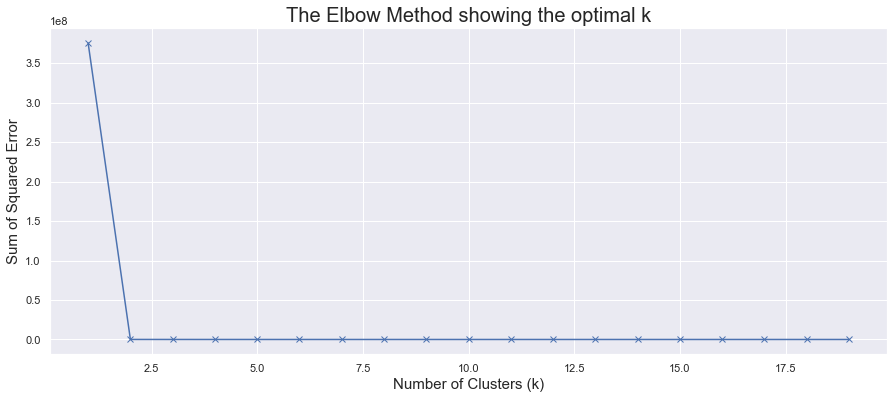

In [73]:
sse = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    sse.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize = 15)
plt.ylabel('Sum of Squared Error', fontsize = 15)
plt.title('The Elbow Method showing the optimal k', fontsize = 20)
plt.show()

We use k = 3. k=2 and k=4 can also give good results. However, increasing the value above 3 will not give an increase in performance

In [74]:
gmm = GaussianMixture(n_components = 2) 
gmm.fit(df1)

GaussianMixture(n_components=2)

# Using Silhouette Score as Evaluation Metric for KMeans

In [77]:
from sklearn.metrics import silhouette_score

df1['cluster_label'] = 0
X = df1
y = df1['cluster_label']
print("Clusters\tSilhoutte Score\n")
for n_cluster in range(2, 20):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("k = {} \t--> \t{}".format(n_cluster, sil_coeff))

<ipython-input-77-bf168e7f8e8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster_label'] = 0


Clusters	Silhoutte Score

k = 2 	--> 	0.9982621408384088
k = 3 	--> 	0.6686929080074914
k = 4 	--> 	0.5310162990835897
k = 5 	--> 	0.40979793406619247
k = 6 	--> 	0.2773373412499584
k = 7 	--> 	0.21683287632903428
k = 8 	--> 	0.23899709240257308
k = 9 	--> 	0.2305796334349628
k = 10 	--> 	0.22793967240314458
k = 11 	--> 	0.21501050596408247
k = 12 	--> 	0.19748127069380983
k = 13 	--> 	0.19419748049419383
k = 14 	--> 	0.19190556098622052
k = 15 	--> 	0.1827302983141814
k = 16 	--> 	0.17957892825220312
k = 17 	--> 	0.17955074534740767
k = 18 	--> 	0.17510969329024628
k = 19 	--> 	0.17194252717143504


These scores show that using k=3 and k=4 give really good results, while k=2 is also a good option. We choose k=3. 

# Applying KMeans (k=3)

In [78]:
kmeans = KMeans(n_clusters = 2, init ='k-means++', verbose = 1)

In [80]:
kmeans.fit(df1)

Initialization complete
Iteration 0, inertia 60963.65901910502
Iteration 1, inertia 55698.669197913405
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 68987.60629173659
Iteration 1, inertia 55698.669197913354
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 71955.20790364667
Iteration 1, inertia 55698.6691979134
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 97502.41763594022
Iteration 1, inertia 55698.6691979134
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 71796.16894192169
Iteration 1, inertia 55698.669197913405
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 90969.4271796026
Iteration 1, inertia 55698.669197913405
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 62212.98202711835
Iteration 1, inertia 55698.6691979134
Converged 

KMeans(n_clusters=2, verbose=1)

In [81]:
df1['cluster_label'] = kmeans.fit_predict(df1)

Initialization complete
Iteration 0, inertia 61800.73494251458
Iteration 1, inertia 55698.669197913354
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 65167.18623953526
Iteration 1, inertia 55698.669197913354
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 67283.96384948347
Iteration 1, inertia 55698.6691979134
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 127821.1946805892
Iteration 1, inertia 55698.669197913405
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 70913.99388953473
Iteration 1, inertia 55698.6691979134
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 168467.16824648526
Iteration 1, inertia 55698.6691979134
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 68530.23892719329
Iteration 1, inertia 55698.6691979134
Converged 

<ipython-input-81-ea5cefc4b2a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster_label'] = kmeans.fit_predict(df1)


In [82]:
df1.head(10)

,New Job (90 Days),Year Started,Job Title_embedding,Company Location_embedding,Company Name_embedding,Industry_embedding,Profile Headline_embedding,Profile Summary_embedding,School_embedding,Degree_embedding,Education End_embedding,Field of Study_embedding,Domain_embedding,CompanyName_embedding,FieldOfStudy_embedding,cluster_label
0,False,2020.0,0.779540,-1.265540,0.388687,0.551558,0.568144,-0.359584,0.569816,-0.616228,-0.534899,0.078564,0.195954,0.388687,0.661440,0
1,False,2018.0,0.226097,0.386156,0.297323,-0.245237,0.432931,-0.648065,0.259484,-0.616228,-0.534899,-0.594768,0.195954,0.297323,-0.594768,0
2,False,2018.0,0.319102,0.064967,-0.190701,-0.245237,-0.202704,0.334044,-0.367105,-0.616228,-0.534899,0.145754,0.195954,-0.190701,-0.594768,0
3,False,2018.0,0.319102,0.411865,0.143441,-0.245237,0.255732,0.006889,0.751344,-0.128450,-0.534899,-0.226775,0.195954,0.143441,-0.594768,0
4,True,2021.0,0.045442,0.626538,-0.285993,-0.245237,0.360941,0.006889,0.751344,-0.128450,-0.515048,-0.226775,0.195954,-0.285993,-0.594768,0
5,True,2021.0,0.319102,0.201492,0.012700,-0.245237,-0.051596,-0.122784,0.416576,-0.128450,-0.515048,0.658242,0.195954,0.012700,0.661440,0
6,True,2021.0,0.119786,0.411865,-0.308487,-0.245237,0.555391,-0.272439,0.751344,-0.128450,-0.534899,-0.461791,0.195954,-0.308487,-0.594768,0
7,False,2020.0,-0.195306,0.144873,0.004644,0.394512,-0.143055,-0.465132,0.751344,-0.128450,-0.799207,0.285601,0.195954,0.004644,0.285601,0
8,False,2020.0,0.118926,0.561729,0.296473,0.389670,0.488983,-0.034840,0.751344,-0.128450,-0.515048,0.511269,0.195954,0.296473,0.511269,0
9,False,2020.0,0.142881,0.411865,0.111753,0.551558,0.488627,-0.040479,0.786686,-0.128450,-0.515048,0.439862,0.195954,0.111753,0.531046,0


In [83]:
df1['cluster_label'].value_counts()

0    4816
1      94
Name: cluster_label, dtype: int64